# Macroscopic body Green's tensor

The presence of a macroscopic body in the space surrounding an atom shifts the energy levels of the atom and modifies the spontaneous emission of said atom. In order to understand the coupling of the atom to the macroscopic object we use the Green's tensor method. IN which, we decompose the EM field produced at a point in space $\vec{r}$ at time $t$ produced by a source at $\vec{r}'$ at time $t'=0$. This tensor can be decomposed as:

$\pmb{G}(\vec{r}, \vec{r}', \omega) = \pmb{G}_0(\vec{r}, \vec{r}', \omega) + \pmb{G}_{sc}(\vec{r}, \vec{r}', \omega)$

Where $\pmb{G}_0 $ is the Green's tensor of a homogeneous medium (vacuum) and $\pmb{G}_{sc}$ is the scattering due to the presence of the nanofiber.

$\pmb{G}_0 = \displaystyle \frac{-\delta(\vec{r} - \vec{r}')}{3k_2^2} \pmb{1} + \displaystyle \frac{e^{ik_2R}}{4\pi R}\left[ \left(1 + \displaystyle \frac{ik_2R}{k_2^2 R^2}\right)\pmb{1} + \displaystyle \frac{3 - 3ik_2R - k_2^2 R^2}{k_2^2 R^2} (\vec{r}\otimes \vec{r}')\right] $ 

$R = |\vec{r} - \vec{r}'|$, $\otimes$ : tensor product

$k_2^2 = \displaystyle \frac{\omega^2}{c^2}$ wave vector norm in the vacuum.

There is a divergence of the Green's tensor for $\vec{r} = \vec{r}'$ ($R=0$).

In [1]:
# import libraries 
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import cmath
from math import *

For $r > a$  and  $r' > a$, with $a$ the nanofiber's radius:

$\pmb{G}_{sc}(\vec{r}, \vec{r}', \omega) = \displaystyle \frac{i}{8\pi}\sum_{\nu = -\infty}^{\infty}\int_{-\infty}^{\infty} \displaystyle \frac{d\beta}{\eta_2^2} \left\{ \left[A_R \vec{M}_{\nu}(\beta, \vec{r}) + B_R \vec{N}_{\nu}(\beta, \vec{r}) \right]\vec{M}_{\nu}^{*}(\beta, \vec{r}') + \left[ C_R \vec{N}_{\nu}(\beta, \vec{r}) + D_R\vec{M}_{\nu}(\beta, \vec{r}) \right]\vec{N}_{\nu}^{*}(\beta, \vec{r}')\right\}$

where $\eta_2 = \sqrt{k_2^2-\beta^2}$

$\beta$ : projection of $\vec{k}$ over the nanofiber's axis.

$|\beta| = \displaystyle \frac{\omega}{c} cos(\theta_0)$

In [2]:
#%% Integrand

def IGA(nu, beta, k1, k2, r_vect, r_s, a=1):
    
    Eta1 = a*np.emath.sqrt(k1**2 - beta**2)
    Eta2 = a*np.emath.sqrt(k2**2 - beta**2) #complex for guided modes
    k1 = k1*a
    k2 = k2*a
    
    r_vect = r_vect/a
    r_obs = r_s/a
    
    [AR, BR, CR] = scalar_coeffs(nu, a*beta, Eta1, Eta2, k1, k2)
    
    [M1, N1, M_conj1, N_conj1] = Vector_field_coeffs(r_vect, r_s, nu, beta, Eta2)
    
    term1 = (AR*M1 + BR*N1)
    term2 = (CR*N1 + BR*M1)
    
    Int_GA = (1j/(8*pi*Eta2**2)) * (np.outer(term1, M_conj1)
                                  + np.outer(term2, N_conj1))
        
    return Int_GA

#print(IGA(0, 1.5, 2, 1, np.array([1, 0, 1]), np.array([1, 0, 1])))

## Vector coefficients

$\vec{M}_{\nu}, \vec{N}_{\nu}$ are vector wavefunctions and $A_R, C_R, B_R = D_R$ some scalar coefficients determined with EM field continuity relations on the surface of the fiber.

To make the coefficients dimentionless $\bar{r} = r/a$, $\bar{\eta} = a \eta$, $\bar{\beta} = a \beta$

\begin{align}
\vec{M}_{\nu}(\beta, \vec{r}) & = a\left[ \displaystyle \frac{i\nu}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta} \bar{r})\vec{e_r} - \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta} \bar{r}) \vec{e_{\varphi}}\right] e^{i(\nu \varphi + \beta z)}\\
\vec{N}_{\nu}(\beta, \vec{r}) & = \displaystyle \frac{1}{a\sqrt{\bar{\eta}^2 + \bar{\beta}^2}} \left[ i \bar{\beta} \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta}\bar{r}) \vec{e_r} - \displaystyle \frac{\nu\bar{\beta}}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_{\varphi}} + \bar{\eta}^2 H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_z} \right] e^{i(\nu \varphi + \beta z)} \\
\vec{M}_{\nu}^{*}(\beta, \vec{r}) & = a \left[ \displaystyle -\frac{i\nu}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta} \bar{r})\vec{e_r} - \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta} \bar{r}) \vec{e_{\varphi}}\right] e^{-i(\nu \varphi + \beta z)} \\
\vec{N}_{\nu}^{*}(\beta, \vec{r}) & = \displaystyle \frac{1}{a\sqrt{\bar{\eta}^2 + \bar{\beta}^2}} \left[ -i \bar{\beta} \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta}\bar{r}) \vec{e_r} - \displaystyle \frac{\nu\bar{\beta}}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_{\varphi}} + \bar{\eta}^2 H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_z} \right] e^{-i(\nu \varphi + \beta z)} \\
\end{align}

In [3]:
def Vector_field_coeffs(r_vect, r_s, nu, beta, eta, a=1): # -> 4 vectors of size (3, 1)
    
    """
    nu = mode
    beta = integration point in the real line (physically: propagation direction)
    r_vect = position to calculate the field vector in cartesian coordinates
    r_s = position vector of the source in cartesian coordinates
    
    """
    
    #observation vector
    r, phi, z = r_vect #cylindrical
    
    er = np.array([cos(phi), sin(phi), 0]) #radial unity vector
    ephi = np.array([-sin(phi), cos(phi), 0]) #angular unity vector
    ez = np.array([0, 0, 1]) #axis unity vector
    
    Hn = scipy.special.hankel1(nu, eta*r)
    Hn_prime = scipy.special.h1vp(nu, eta*r)
    
    #Source vector
    rs, phi_s, zs = r_s
    
    er_s = np.array([cos(phi_s), sin(phi_s), 0]) #radial unity vector
    ephi_s = np.array([-sin(phi_s), cos(phi_s), 0]) #angular unity vector
    ez_s = np.array([0, 0, 1]) #axis unity vector
    
    Hn_s = scipy.special.hankel1(nu, eta*rs)
    Hn_prime_s = scipy.special.h1vp(nu, eta*rs)
    
    M = a*((1j*nu/r)*Hn*er - eta*Hn_prime*ephi) * cmath.exp(1j*(nu*phi + beta*z))
    
    N = (1/a)*(1/cmath.sqrt(eta**2 + beta**2)) * (1j*eta*beta*Hn_prime*er - (nu*beta/r)*Hn*ephi + eta**2*Hn*ez) * cmath.exp(1j*(nu*phi + beta*z))
    
    M_conj = a*((-1j*nu/rs)*Hn_s*er_s - eta*Hn_prime_s*ephi_s) * cmath.exp(-1j*(nu*phi_s + beta*zs))
    
    N_conj = (1/a)*(1/cmath.sqrt(eta**2 + beta**2)) * (-1j*eta*beta*Hn_prime_s*er_s - (nu*beta/rs)*Hn_s*ephi_s + eta**2*Hn_s*ez_s) * cmath.exp(-1j*(nu*phi_s + beta*zs))
    
    return [M, N, M_conj, N_conj]

## Scalar coefficients

To make these coefficients dimentionless : $\bar{r} = r/a$, $\bar{\eta} = a \eta$, $\bar{\beta} = a \beta$ ans $\bar{k} = a k $

\begin{align}
A_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta_2})}{H_{\nu}^{(1)}(\bar{\eta_2})} \left[ (\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} -  \frac{1}{\bar{\eta}_1^2} \right)^2 - \left( \frac{J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{J_{\nu}^{'}(\bar{\eta_2})}{\bar{\eta}_2 J_{\nu}(\bar{\eta_2})}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{\bar{k}_2^2 H_{\nu}^{'(1)}(\bar{\eta_2})}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta_2})}  \right)\right] \\
C_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta}_2)}{H_{\nu}^{(1)}(\bar{\eta}_2)}  \left[(\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} -  \frac{1}{\bar{\eta}_1^2} \right)^2   - \left( \frac{J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{H_{\nu}^{'(1)}(\bar{\eta_2})}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta_2})}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{\bar{k}_2^2 J_{\nu}^{'}(\bar{\eta_2})}{\bar{\eta}_2 J_{\nu}(\bar{\eta_2})}  \right) \right]\\
B_R = D_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta}_2)}{H_{\nu}^{(1)}(\bar{\eta}_2)}\nu \bar{\beta} \frac{\bar{k}_2}{\bar{\eta}_2} \left( \frac{1}{\bar{\eta}_2^2} - \frac{1}{\bar{\eta}_1^2} \right) \left( \frac{J_{\nu}^{'}(\bar{\eta_2})}{J_{\nu}(\bar{\eta_2})} - \frac{H_{\nu}^{'(1)}(\bar{\eta_2})}{H_{\nu}^{(1)}(\bar{\eta_2})}  \right) \\
\end{align}

In [4]:
def scalar_coeffs(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm, a=1):
    
    """
    nu = mode
    beta = integration point (dimentionless)
    eta i_norm: eta_i*a 
    k i_norm: k_i*a  
    
    """
    
    #Bessel fucntions
    J1 = scipy.special.jv(nu, eta1_norm)
    J2 = scipy.special.jv(nu, eta2_norm)
    
    #H2 = Hankel_n(nu, eta2*a)
    H2 = scipy.special.hankel1(nu, eta2_norm) #complex
    
    #Derivatives of the bessel functions
    JD1 = scipy.special.jvp(nu, eta1_norm)
    JD2 = scipy.special.jvp(nu, eta2_norm)
    
    #HD2 = Hankel_n_prime(nu, eta2*a)
    HD2 = scipy.special.h1vp(nu, eta2_norm) #complex
    
    W = WR(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm)
    
    A = (1/W)*(J2/H2) * ((nu*beta*a)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
          - (JD1/(eta1_norm*J1) - JD2/(eta2_norm*J2)) * ((k1_norm**2*JD1)/(eta1_norm*J1) - (k2_norm**2*HD2)/(eta2_norm*H2)))
    
    B = (1/W)*(J2/H2) * (k2_norm*nu*beta*a/(eta2_norm))*(1/(eta2_norm**2) - 1/(eta1_norm**2))*(JD2/J2 - HD2/H2)

    C = (1/W)*(J2/H2) * ((nu*beta*a)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
        - (JD1/(eta1_norm*J1) - HD2/(eta2_norm*H2))*((k1_norm**2*JD1)/(eta1_norm*J1) - (k2_norm**2*JD2)/(eta2_norm*J2)))
        
    return [A, B, C] #D=B

$W_R = \displaystyle \frac{\nu^2 \beta^2}{a^2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right)^2 + \left( \frac{J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right) \left( \frac{k_1^2 J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{k_2^2 H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right)$

If we make it dimentionless:

$W_R = \displaystyle (\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} - \frac{1}{\bar{\eta}_1^2} \right)^2 + \left( \frac{J_{\nu}^{'}(\bar{\eta}_1)}{\bar{\eta}_1 J_{\nu}(\bar{\eta}_1)} - \frac{H_{\nu}^{'(1)}(\bar{\eta}_2)}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta}_2)}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta}_1)}{\bar{\eta}_1 J_{\nu}(\bar{\eta}_1)} - \frac{\bar{k}_2^2 H_{\nu}^{'(1)}(\bar{\eta}_2)}{\bar{\eta}_2 H_{\nu}^{(1)} (\bar{\eta}_2)}  \right)$

In [5]:
def WR(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm, a=1): 
    
    """
    nu = mode
    beta = integration point (dimentionless)
    eta i_norm: eta_i*a 
    k i_norm: k_i*a  
    
    """
    
    #Bessel fucntions
    J1 = scipy.special.jv(nu, eta1_norm)
    H2 = scipy.special.hankel1(nu, eta2_norm)
    
    #Derivatives of the bessel functions
    JD1 = scipy.special.jvp(nu, eta1_norm)
    HD2 = scipy.special.h1vp(nu, eta2_norm)

    W = -(nu*beta)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
       + (JD1/(eta1_norm*J1) - HD2/(eta2_norm*H2))*(k1_norm**2*JD1/(eta1_norm*J1) - k2_norm**2*HD2/(eta2_norm*H2))

    return W

$\pmb{G}_{sc}(\vec{r}, \vec{r}', \omega) = \displaystyle \sum_{\nu = -\infty}^{\infty} \int_{-\infty}^{\infty} d \beta \  \bar{f}_{\nu}(\rho, \rho', \omega, \beta, a) = \displaystyle \sum_{\nu = -\infty}^{\infty} \int_{-\infty}^{\infty} d \beta \  \bar{g}_{\nu}(\rho, \rho', \omega, \beta, a) \ e^{i(\nu \Delta \phi + \beta \Delta z)} $ 

with $\bar{g}_{\nu}(\rho, \rho', \omega, \beta, a) = \displaystyle \frac{i}{8\pi \ \eta_2^2} \left\{ \left[A_R \vec{M}_{\nu}(\beta, \vec{r}) + B_R \vec{N}_{\nu}(\beta, \vec{r}) \right]\vec{M}_{\nu}^{*}(\beta, \vec{r}') + \left[ C_R \vec{N}_{\nu}(\beta, \vec{r}) + D_R\vec{M}_{\nu}(\beta, \vec{r}) \right]\vec{N}_{\nu}^{*}(\beta, \vec{r}')\right\} \ e^{-i(\nu \Delta \phi + \beta \Delta z)} $


To calculate this integral we use the **residue theorem**: 

I = $\displaystyle \oint_{C} d \beta \  \bar{f}_{\nu}(\rho, \rho', \omega, \beta, a) = 2\pi i \sum_j res(f_{\nu}(\beta), \beta_j)$ with C the following contour:

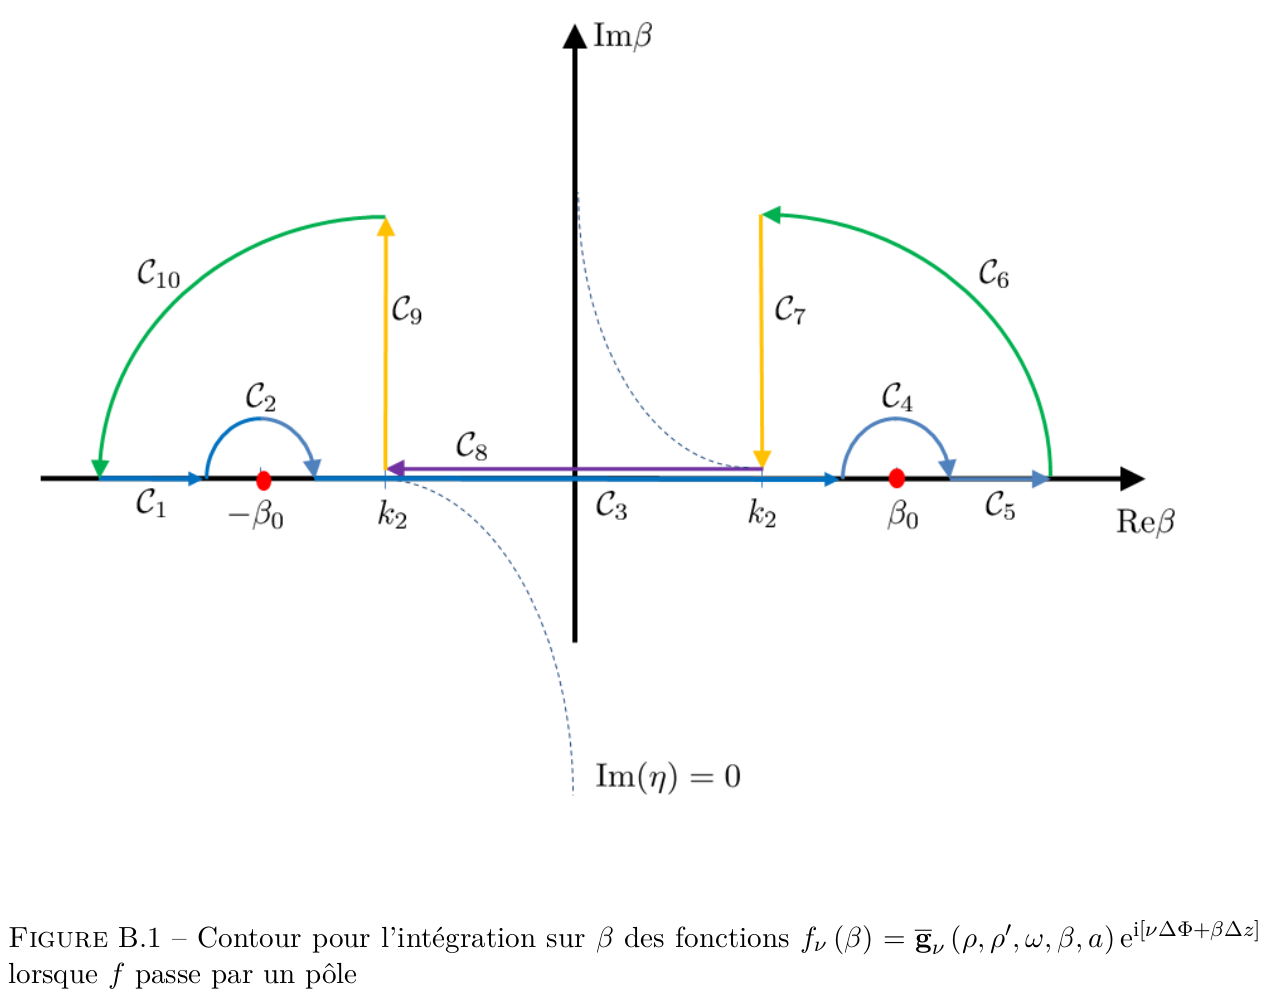


$\beta_j$ are the poles inside this contour, à priori they are the poles from the *guided modes*  and the ones on $\beta = \pm k_2 = \pm \displaystyle \frac{\omega}{c}$ these poles all sit on the real axis.

$I = I_{axis} + I_2 + I_4 + I_6 + I_7 + I_8 + I_9 + I_{10}$

for $R_c \rightarrow \infty$ then $I_6 \rightarrow 0 $ and $ I_{10} \rightarrow 0 $ by **Jordan's Lemma**.

Then $I = 2\pi i \sum_j res(f_{\nu}(\beta), \beta_j) = I_{axis} + I_2 + I_4 + I_{branches} + I_8 \ $ 


In [6]:
n_f = 1.45 #index of refraction nanofiber
n_env = 1 #index of refraction environnement
# eps_f = n_f**2
# eps_env = 1

rA = np.array([2, 0, 0]) #coordinate of the evaluation point (nm)
rB = np.array([2, 0, 10]) #coordinate of the source point (nm)

# We are goin to find the poles with k0 and nu
k0 = 1.2 #10
k1 = n_f*k0
k2 = k0

nu_value = 0

$I_{branches} =  I_7 + I_9 = i \ \lim_{Rc \rightarrow \infty} \displaystyle \int_{0}^{Rc} d\epsilon \ \left[\bar{g}_{\nu}(-k_2 + i\epsilon) e^{-ik_2 \Delta z}  - \bar{g}_{\nu}(k_2 + i\epsilon) e^{ik_2 \Delta z} \right] e^{i\nu \Delta \phi - \epsilon \Delta z}$

With the property $\bar{g}_{\nu}(-k_2 + i\epsilon) = \bar{g}_{\nu}^{*}(-k_2 + i\epsilon) $ we get $\left[\bar{g}_{\nu}(k_2 + i\epsilon) e^{-ik_2 \Delta z}  - \bar{g}_{\nu}^{*}(-k_2 + i\epsilon) e^{ik_2 \Delta z} \right] = 2i \ Im \left[ \bar{g}_{\nu}(k_2 + i\epsilon) e^{ik_2 \Delta z} \right]$:

$I_{branch, \nu} = -2 \displaystyle \lim_{Rc \rightarrow \infty} \displaystyle \int_{0}^{Rc} d\epsilon \ Im \left[\bar{g}_{\nu}(-k_2 + i\epsilon) e^{-ik_2 \Delta z} \right] e^{i\nu \Delta \phi - \epsilon \Delta z}$ 

This integral contributes for the frecuency shifts  for the non-guided modes.

In [7]:
#%% Branch integrand

def I_branch(nu, beta, k1, k2, r_vect, r_s, a=1):
    
    Eta1 = a*np.emath.sqrt(k1**2 - beta**2)
    Eta2 = a*np.emath.sqrt(k2**2 - beta**2) #complex for guided modes
    k1 = k1*a
    k2 = k2*a
    
    r_vect = r_vect/a
    r_obs = r_s/a
    
    dr, dphi, dz = r_vect - r_obs #cylindrical
    
    [AR, BR, CR] = scalar_coeffs(nu, a*beta, Eta1, Eta2, k1, k2)
    
    [M1, N1, M_conj1, N_conj1] = Vector_field_coeffs(r_vect, r_s, nu, beta, Eta2)
    
    term1 = (AR*M1 + BR*N1)
    term2 = (CR*N1 + BR*M1)
    
    g = (1j/(Eta2**2)) * (np.outer(term1, M_conj1)
                                  + np.outer(term2, N_conj1))*cmath.exp(-1j*nu*dphi)
    
    eps = beta.imag
    
    Int_B = g.imag * cmath.exp(-1j*nu*dphi)
    
    return Int_B

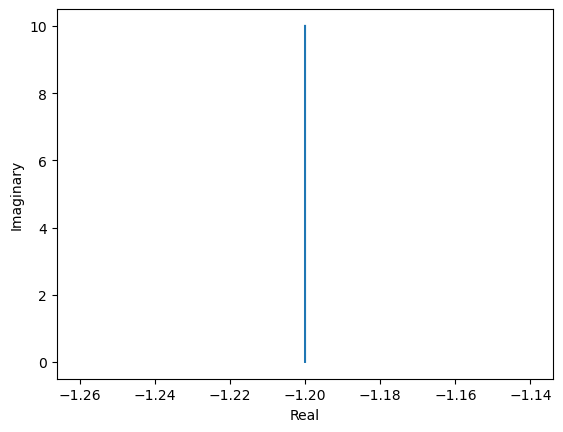

In [8]:
Rc = 10 # Rc >> 2.25
delta = 1e-3
step = 1e-4

C9 = 1j*np.arange(delta, Rc+step, step) - k0

x9 = C9.real
y9 = C9.imag

plt.plot(x9, y9)

plt.ylabel('Imaginary') 
plt.xlabel('Real')
plt.show() 

$I_8 = \displaystyle \int_{-k_2}^{k_2} d\beta \ \bar{g}_{\nu}(\rho, \rho', \omega, \beta, a) \ e^{i(\nu \Delta \phi + \beta \Delta z)} $


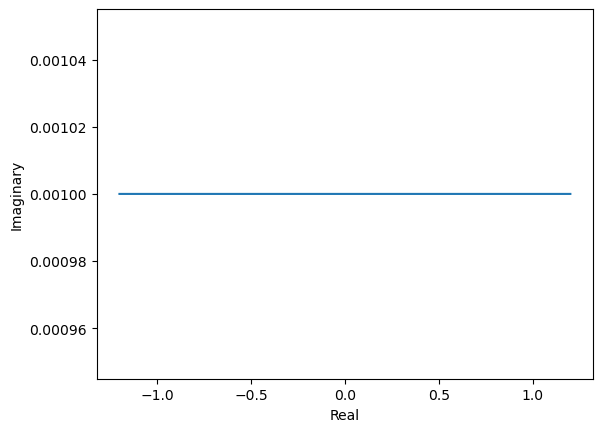

In [9]:
C8 = np.arange(k0, -k0, -step) +1j*delta

x8 = C8.real
y8 = C8.imag

plt.plot(x8, y8)

plt.ylabel('Imaginary') 
plt.xlabel('Real')
plt.show() 

$I2 = i \pi \ res(f_{\nu}(\beta), -\beta_0)$ and $ I4 = i \pi \  res(f_{\nu}(\beta), \beta_0)$ for $Rp \rightarrow 0$

So $I_{axis} = 2\pi i \sum_j res(f_{\nu}(\beta), \beta_j) - i \pi \ res(f_{\nu}(\beta), -\beta_0) - i \pi \  res(f_{\nu}(\beta), \beta_0) - I_{branches} - I_8 \ $ 

## Residue calculation for the guided pole contributions.

$Res(f, \beta_{\lambda}) = \displaystyle \frac{1}{2 i \pi} \oint_{\partial B_R} f(\beta) d\beta = a_{-1}$

if pole of order 1: $a_{-1} = \displaystyle \lim_{\beta \rightarrow \beta_{\lambda}} \left( (\beta - \beta_{\lambda}) \cdot \ f(\beta_{\lambda}) \right)  = \displaystyle \lim_{h \rightarrow 0} \  h \cdot \ f(\beta_{\lambda})$ with $h = (\beta - \beta_{\lambda})$ : numerical step.

In [10]:
nu = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5] #terme dans la somme (mode)
Line_beta = np.arange(k0 + step, n_f * k0 - step, step)
beta_pole = []
pole_index = []

Iax = 0
for nu_value in nu:
    
    beta_pole.append([])
    pole_index.append([])
    
    result = []
    
    number_of_poles = 0
    
    #Pole determination
    for ind, beta in enumerate(Line_beta): 
        Eta1 = cmath.sqrt(k1**2 - beta**2)
        Eta2 = cmath.sqrt(k2**2 - beta**2)
    
        result.append(abs(WR(nu_value, beta, Eta1, Eta2, k1, k2)))
        #Poles when WR = 0, however to refine the pole search we can use log(WR)
        #log(WR -> 0) -> -oo se we just have to grab the values for beta that make log(WR) < 0

    result_l = np.log(result) 
    result_dl = np.gradient(result_l)
    
    for index in range(len(result_dl)-1): 
        if result_l[index] < 0 and (result_dl[index] < 0 and result_dl[index+1] > 0): 
            
            beta_pole[-1].append(Line_beta[index])
            pole_index[-1].append(index)
        
    number_of_poles = len(beta_pole[-1])

    print("Number of poles for mode nu = {}: ".format(nu_value), number_of_poles, "\n")
    
    #Branch
    print("Calculating branch integral... \n")
    I9 = 0
    
    for i in range(len(C9)-1):
    
        I9 += (step/2) * (I_branch(nu_value, C9[i], n_f*k0, k0, rA, rB) + I_branch(nu_value, C9[i+1], n_f*k0, k0, rA, rB))
    
    #On top of the axis
    print("Integral on contour 8... \n")
    I8 = 0
    
    for i in range(len(C8)-1):
    
        I8 += (step/2) * (IGA(nu_value, C8[i], n_f*k0, k0, rA, rB) + (IGA(nu_value, C8[i+1], n_f*k0, k0, rA, rB)))
    
    print("Residue calculations... \n")
    Res_guided_poles = 0

    for k, pole in enumerate(beta_pole[-1]): 
        #print("pole: ", pole)
        #contributions from poles in [k0 + step, n_f * k0 - step]
        Res_guided_poles += 2j*np.pi * step * IGA(nu_value, pole, n_f*k0, k0, rA, rB) 
    
        #contributions from poles in [-n_f * k0 + step, -k0 - step,]
        Res_guided_poles = 2*Res_guided_poles
    
    Res_beta_0 = 0

    Res_beta_0 += 1j*np.pi * step * IGA(nu_value, n_f * k0 - step, n_f*k0, k0, rA, rB) 
    Res_beta_0 += 1j*np.pi * step * IGA(nu_value, -n_f * k0 + step, n_f*k0, k0, rA, rB)
    
    Iax = Iax -(I8 + I9 + Res_guided_poles + Res_beta_0)
    
    print("\n")

Number of poles for mode nu = -5:  0 

Calculating branch integral... 

Integral on contour 8... 

Residue calculations... 



Number of poles for mode nu = -4:  0 

Calculating branch integral... 

Integral on contour 8... 

Residue calculations... 



Number of poles for mode nu = -3:  0 

Calculating branch integral... 

Integral on contour 8... 

Residue calculations... 



Number of poles for mode nu = -2:  0 

Calculating branch integral... 

Integral on contour 8... 

Residue calculations... 



Number of poles for mode nu = -1:  1 

Calculating branch integral... 

Integral on contour 8... 

Residue calculations... 



Number of poles for mode nu = 0:  0 

Calculating branch integral... 

Integral on contour 8... 

Residue calculations... 



Number of poles for mode nu = 1:  1 

Calculating branch integral... 

Integral on contour 8... 

Residue calculations... 



Number of poles for mode nu = 2:  0 

Calculating branch integral... 

Integral on contour 8... 

Residue calcula

In [11]:
print(Iax)

[[ 8.48246807e+41+2.61580835e-02j  0.00000000e+00+1.53524722e-21j
   1.60962453e+41-2.72029799e-03j]
 [-2.41785164e+24+9.16383770e-20j -1.93330042e+40+1.38867067e-02j
  -2.41785164e+24-2.42727879e-19j]
 [-1.60962453e+41+2.72029799e-03j  0.00000000e+00-2.63003730e-19j
   8.81429696e+41+2.59403515e-03j]]


In [12]:
I8

array([[-6.11749757e-07+5.57247174e-10j, -1.61971598e-10-4.69576332e-07j,
        -3.67559026e-07+1.02773479e-10j],
       [ 1.61971598e-10+4.69576332e-07j, -3.61182508e-07-5.42354299e-11j,
         1.36397725e-10+2.71790050e-07j],
       [ 3.67559026e-07-1.02773479e-10j,  1.36397725e-10+2.71790050e-07j,
        -8.92933893e-08+5.49433271e-11j]])

In [13]:
I9

array([[-6.08789554e+40+0.j,  1.39418615e+40+0.j,  4.83615985e+40+0.j],
       [-1.39418615e+40+0.j,  2.94790473e+39+0.j,  1.53884788e+40+0.j],
       [-4.83615985e+40+0.j,  1.53884788e+40+0.j, -6.15303594e+40+0.j]])

## Symmetry testing for the integrand of the Green's function.

$g_{\nu} = IGA \cdot e^{-i(\nu \Delta \phi + \beta \Delta z)}$


In [14]:
def g_nu(nu, beta, k1, k2, r_vect, r_s):
    
    dz = r_vect[2] - r_s[2]
    dphi = r_vect[1] - r_s[1]
    
    return IGA(nu, beta, k1, k2, r_vect, r_s)*np.exp(-1j*(nu*dphi + beta*dz))


In [21]:
g_nu(1, 1.4, n_f*k0, k0, rA, rB)

array([[ 2.41101298e-03-5.96311195e-19j, -3.25260652e-19-1.00891370e-03j,
         2.43945489e-19+1.32014827e-03j],
       [ 2.71050543e-19+1.00891370e-03j,  5.57616148e-04-2.30392962e-19j,
        -5.81845528e-04+1.21972744e-19j],
       [-1.89735380e-19-1.32014827e-03j, -5.81845528e-04+1.35525272e-19j,
         7.29235477e-04-5.42101086e-20j]])

In [22]:
g_nu(-1, 1.4, n_f*k0, k0, rA, rB)

array([[ 2.41101298e-03-5.96311195e-19j,  3.25260652e-19+1.00891370e-03j,
         2.43945489e-19+1.32014827e-03j],
       [-2.71050543e-19-1.00891370e-03j,  5.57616148e-04-2.30392962e-19j,
         5.81845528e-04-1.21972744e-19j],
       [-1.89735380e-19-1.32014827e-03j,  5.81845528e-04-1.35525272e-19j,
         7.29235477e-04-5.42101086e-20j]])

In [23]:
g_nu(1, -1.4, n_f*k0, k0, rA, rB)

array([[ 2.41101298e-03-7.04731412e-19j, -3.52365706e-19-1.00891370e-03j,
        -2.16840434e-19-1.32014827e-03j],
       [ 2.98155597e-19+1.00891370e-03j,  5.57616148e-04-2.71050543e-19j,
         5.81845528e-04-1.35525272e-19j],
       [ 2.43945489e-19+1.32014827e-03j,  5.81845528e-04-1.62630326e-19j,
         7.29235477e-04-8.13151629e-20j]])

In [24]:
g_nu(1, 1.4, n_f*k0, k0, rB, rA)

array([[ 2.41101298e-03-7.58941521e-19j, -2.43945489e-19-1.00891370e-03j,
         3.25260652e-19+1.32014827e-03j],
       [ 3.52365706e-19+1.00891370e-03j,  5.57616148e-04-2.98155597e-19j,
        -5.81845528e-04+1.62630326e-19j],
       [-1.89735380e-19-1.32014827e-03j, -5.81845528e-04+1.35525272e-19j,
         7.29235477e-04-5.42101086e-20j]])